In [16]:
# imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow
from skimage import color, data, io
import numpy as np

(512, 512, 3) uint8 <class 'numpy.ndarray'>


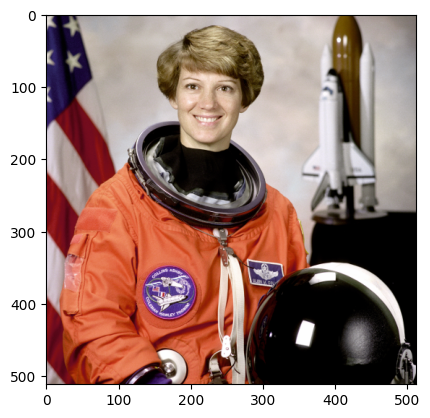

In [17]:
# loading
image = data.astronaut()
plt.imshow(image)
print(image.shape, image.dtype, type(image))

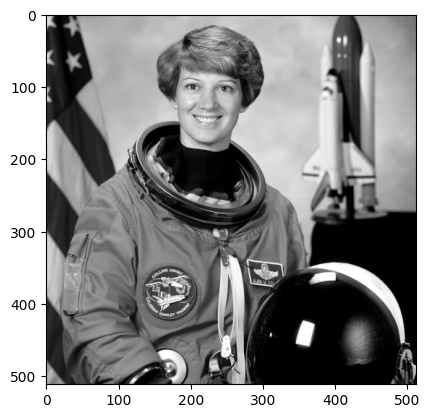

In [18]:
# grayscale
im_g=color.rgb2gray(image)
im_g = 255*im_g
plt.imshow(im_g, cmap ='gray')

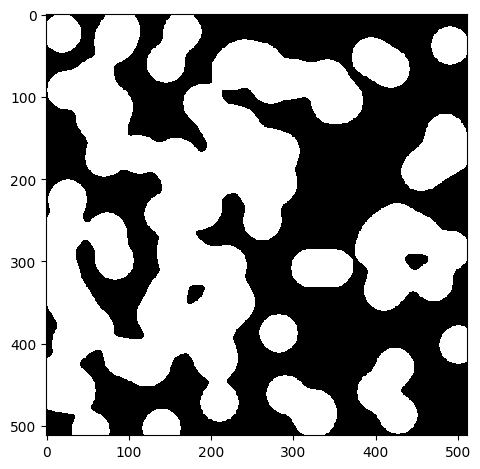

In [43]:
# loading
image = data.binary_blobs()
io.imshow(image)

In [44]:
sh = image.shape
sh

(512, 512)

In [45]:
# user input for down sampling rate
ds = int(input("Enter rate for Down Sampling: "))
ds

Enter rate for Down Sampling: 5


5

In [46]:
# taking subpart of image
row = int(sh[0]/ds) + 1
col = int(sh[1]/ds) + 1
print(row)
print(col)

103
103


(103, 103)


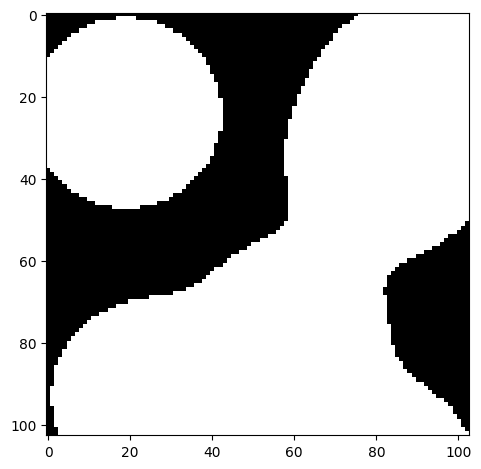

In [47]:
image_down = image.copy()
image_down = image_down[0:row, 0:col]
io.imshow(image_down, cmap ='gray')
print(image_down.shape)

In [48]:
# down sampling
rw =0

for rows in range(0, sh[0], ds):
  cl =0
  for cols in range(0, sh[1], ds):
    image_down[rw][cl] = image[rows][cols]
    cl = cl + 1
  rw = rw + 1

print(image_down.shape)

(103, 103)


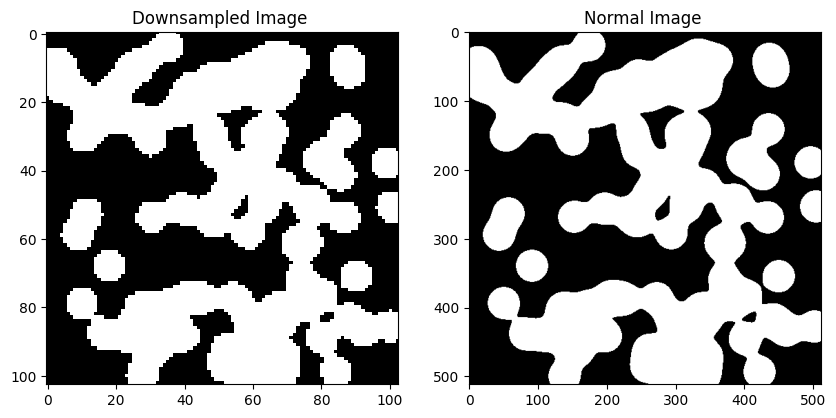

In [25]:
# displaying down sampled image
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.axis('on')
plt.title('Downsampled Image ')
plt.imshow(image_down, cmap = 'gray')
plt.subplot(122)
plt.axis('on')
plt.title('Normal Image ')
plt.imshow(image, cmap = 'gray')
plt.show()

In [51]:
# upscaling
img_up = image.copy()
shape = image_down.shape
row2 = 0

for row in range(0, shape[0]):
  col2 = 0
  for col in range(0, shape[1]):
    img_up[row2, col2] = image_down[row, col]
    img_up[row2, (col2 + 1): (col2 + ds)] = 0
    col2 += ds
  img_up[(row2 + 1): (row + ds), :] = 0
  row2 += ds
img_up_before_interpolation = img_up.copy()

shape = img_up.shape

for row in range(0, shape[0], ds):
  for col in range(0, (shape[1] - ds), ds):
    temp1 = img_up[row, col] / 2
    temp2 = img_up[row, (col + ds)] / 2
    temp = temp1 + temp2
    img_up[row, (col + 1): (col + ds)] = int(temp)
for row in range(0, (shape[0] - ds), ds):
  for col in range(0, shape[1], ds):
    temp1 = img_up[row, col] / 2
    temp2 = img_up[(row + ds), col] / 2
    temp = temp1 + temp2
    img_up[row: (row + ds), col] = int(temp)

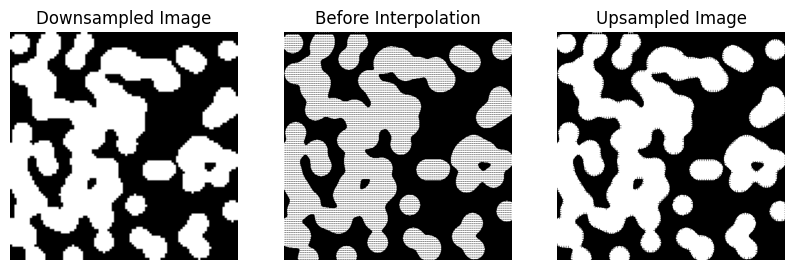

In [53]:
# displaying upsampled image
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.title("Downsampled Image")
plt.axis("off")
plt.imshow(image_down, cmap="gray")
plt.subplot(132)
plt.title("Before Interpolation")
plt.axis("off")
plt.imshow(img_up_before_interpolation, cmap="gray")
plt.subplot(133)
plt.title("Upsampled Image")
plt.axis("off")
plt.imshow(img_up, cmap="gray")